In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Exercise5-2
# 設計量子程式在量子電腦模擬器上執行上題中的量子線路1000次，顯示其量子位元測量結果各種不同量子態被測量出的次數，並顯示對應的長方圖，最後並說明為何測量結果代表黑箱函數為常數函數。

     ┌───┐      ░       ░ ┌───┐┌─┐      
x_0: ┤ H ├──────░───────░─┤ H ├┤M├──────
     ├───┤      ░       ░ ├───┤└╥┘┌─┐   
x_1: ┤ H ├──────░───────░─┤ H ├─╫─┤M├───
     ├───┤      ░       ░ ├───┤ ║ └╥┘┌─┐
x_2: ┤ H ├──────░───────░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ ├───┤ ║  ║ └╥┘
  y: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫──╫──╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║  ║  ║ 
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2 
Counts: {'000': 1000}


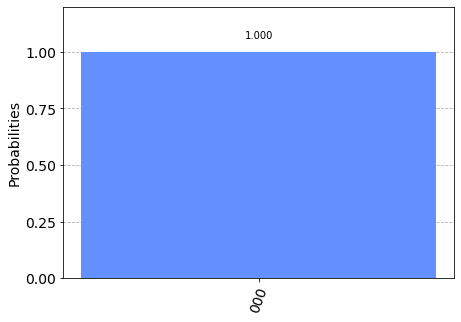

In [5]:
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
qrx = QuantumRegister(3,'x')
qry = QuantumRegister(1,'y')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qrx,qry,cr)
qc.h(qrx)
qc.x(qry)
qc.h(qry)
qc.barrier()
qc.x(qry)
qc.barrier()
qc.h(qrx)
qc.h(qry)
qc.measure(qrx,cr)
print(qc)


sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)